# Project: Investigate a Dataset - No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Why do 20% of patients miss their scheduled appointments? In this project, we will be analyzing the problems associated with missed medical appointments using the `No-show appointments` dataset obtained from [Kaggle](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1532469042118000) and in particular we will be interested in trends amongst patients who miss medical appointments and how they differ from those that showed up.


> This dataset collects information from more than 110,000 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Each row represents 14 unique characteristics for each patient. The features are described below.
1. **PatientId** - Unique identification for each patient.
2. **AppointmentID** - Unique code for each scheduled appointment.
3. **Gender** - Shows whether the patient is male or female.
4. **ScheduledDay** - Time and date the appointment was initiated.
5. **AppointmentDay** - Time and date the appointment is scheduled for.
6. **Age** - How old the patient is.
7. **Neighbourhood** - Indicates the location of the hospital.
8. **Scholarship** - Indicates whether or not the patient is enrolled in the Bolsa Família (Brasilian welfare program). 1 represents **yes** and 0 represents **no**.
9. **Hipertension** - Indicates whether the patient is suffering from hypertension. 1 represents **yes** and 0 represents **no**.  
10. **Diabetes** - Indicates whether the patient is suffering from diabetes. 1 represents **yes** and 0 represents **no**.
11. **Alcoholism** - Indicates whether the patient is addicted to the consumption of alcoholic liquor. 1 represents **yes** and 0 represents **no**.        
12. **Handcap** - Indicates whether the patient is suffering from a physical or mental impairment, rated from **0** to **4**.
13. **SMS_received** - Whether the patient receive a reminder by text. 1 represents **yes** and 0 represents **no**.   
14. **No-show** - Shows whether the patient did not show up for the appointment. 1 represents **yes** and 0 represents **no**.


### Question(s) for Analysis
> The dataset will provide insight into the following questions:
1. Does gender influence the chances of getting a scholarship?
2. What percentage of patients who got a scholarship eventually showed up for their appointment?
3. What is the age distribution of patients who didn't show up for their appointment?
4. What are the top 4 neighbourhoods that did not host patients?



Importing Python packages for data analysis

In [1]:
# Packages for data manipulation

import numpy as np
import pandas as pd

# Packages for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date, timedelta
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties



Loading the `dataset` as a Pandas Dataframe from the `data.csv` file.

In [2]:
# Loading the data and printing out a few lines.

data = pd.read_csv('./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
data.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
47769,9.745426e+13,5691385,F,2016-05-12T12:33:40Z,2016-05-18T00:00:00Z,74,DE LOURDES,0,1,1,0,0,0,No
76306,8.672679e+12,5603257,F,2016-04-19T17:34:18Z,2016-05-16T00:00:00Z,24,ANDORINHAS,0,0,0,0,0,0,Yes
12958,2.471266e+11,5684271,F,2016-05-11T08:25:20Z,2016-05-11T00:00:00Z,16,ILHA DE SANTA MARIA,0,0,0,0,0,0,No
98029,9.728533e+11,5775630,M,2016-06-06T09:42:19Z,2016-06-06T00:00:00Z,1,ANDORINHAS,0,0,0,0,0,0,No
109489,4.511920e+12,5752432,F,2016-05-31T11:44:54Z,2016-06-02T00:00:00Z,59,VILA RUBIM,0,0,0,0,0,0,No


In [3]:
# Renaming cols `Hipertension` and `Handcap`

data.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'}, inplace=True)
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

.

Inspecting `data` for instances of missing or possibly errant data.

In [4]:
# What's the number of rows (or sample of appointments) in the dataset?

print(f"There are {data.shape[0]} observations from the dataset.")

There are 110527 observations from the dataset.


In [5]:
# Count of label classes

data['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Out of 110527 appointments, 22319 patients did not show up for their appointments.

In [6]:
# Percentage of patients who missed their appointment.

num_no_show = data['No-show'].value_counts()['Yes']
num_of_patients = data.shape[0]
print(f"About {100 * num_no_show/num_of_patients:.0f}% of patients missed their appointments.")

About 20% of patients missed their appointments.


In [7]:
# Are there missing entries?

data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

There are no missing values in `data`.

In [8]:
# Are there incorrect feature data type?

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


.

The `ScheduledDay` and `AppointmentDay` columns hold the wrong data type (`str` {seen as `object`} instead of `datetime`)

In [9]:
# Convert the ScheduledDay and AppointmentDay datatype to datetime

data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No-show                        object
dtype: object

In [10]:
data['waitPeriod'] = data['AppointmentDay'] - data['ScheduledDay']
data.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,waitPeriod
108340,2.493326e+11,5762101,F,2016-06-02 07:23:00+00:00,2016-06-08 00:00:00+00:00,31,FORTE SÃO JOÃO,1,0,0,0,0,1,No,5 days 16:37:00
109286,1.352886e+13,5773256,M,2016-06-06 07:02:13+00:00,2016-06-06 00:00:00+00:00,6,FORTE SÃO JOÃO,0,0,0,0,0,0,No,-1 days +16:57:47
15546,8.393238e+14,5604291,F,2016-04-20 07:50:53+00:00,2016-05-06 00:00:00+00:00,12,JESUS DE NAZARETH,0,0,0,0,0,1,No,15 days 16:09:07
86942,7.358187e+11,5706951,M,2016-05-17 09:00:29+00:00,2016-06-01 00:00:00+00:00,32,PRAIA DO SUÁ,0,0,0,1,0,1,No,14 days 14:59:31
27925,5.444857e+11,5712395,F,2016-05-18 08:50:00+00:00,2016-05-20 00:00:00+00:00,64,RESISTÊNCIA,0,1,1,0,0,0,No,1 days 15:10:00
88026,6.571838e+14,5701107,M,2016-05-16 10:07:42+00:00,2016-06-03 00:00:00+00:00,75,ITARARÉ,0,0,1,0,0,0,Yes,17 days 13:52:18
79032,3.911627e+12,5651664,M,2016-05-03 09:07:37+00:00,2016-05-31 00:00:00+00:00,12,MONTE BELO,0,0,0,0,0,1,No,27 days 14:52:23
19561,8.431382e+12,5709426,F,2016-05-17 13:44:39+00:00,2016-05-20 00:00:00+00:00,53,CARATOÍRA,0,1,0,0,0,0,No,2 days 10:15:21
81752,1.616819e+13,5594776,M,2016-04-18 11:15:32+00:00,2016-05-25 00:00:00+00:00,8,ITARARÉ,0,0,0,0,0,1,No,36 days 12:44:28
103821,9.614967e+14,5651403,F,2016-05-03 08:46:55+00:00,2016-06-02 00:00:00+00:00,5,SÃO JOSÉ,0,0,0,0,0,1,Yes,29 days 15:13:05


Some values in `waitPeriod` column are negative, which shouldn't be. Negative values would imply the patient went to the past to fulfill an appointment. And so these row entries must be erroneous.

In [11]:
# Display descriptive statistics on numerical features

data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,waitPeriod
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9 days 17:08:34.161960425
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15 days 05:51:27.891504122
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7 days +10:10:40
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +15:41:31.500000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3 days 11:22:18
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14 days 07:41:34.500000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:19:01


On average, patients schedule their medical appointment in 9 days time.

The median age of the patients is 37. However, the minimum age in the distribution is -1. This can only be an invalid entry. 

In [12]:
# Number of rows with invalid age

data[data['Age'] <= -1].shape

(1, 15)

Only one row of data will be cleared as a result of invalid age.

In [13]:
# Checking for duplicated rows

data.duplicated().sum()

0

There are no duplicated rows in `data`.

In [14]:
# Number of unique values in categorical columns

data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No-show                2
waitPeriod         89712
dtype: int64

In [15]:
data['Handicap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

The `Handcap` column holds 5 different values. It can be reduced to only 2 classes; All entries in {1,2,3,4} will be taken as **1** meaning patient is handicapped and 0 entries will remain **0** meaning not handicapped.  


### Data Cleaning
 

Dropping rows with erroneous `waitPeriod` i.e. where `ScheduledDay` is greater than `AppointmentDay`. 

In [16]:
# Creating a mask for filtering dataset on waitPeriod
valid_waitPeriod = []

for label, content in data['waitPeriod'].iteritems():
    if content.days < 0:
        valid_waitPeriod.append(False)
    else:
        valid_waitPeriod.append(True)

In [17]:
# Dropping invalid `waitPeriod`

data = data[valid_waitPeriod]
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,waitPeriod
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1 days 15:23:09
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:54:48
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:20:02
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1 days 11:11:35
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1 days 09:01:49


In [18]:
data['waitPeriod'].describe()

count                         71959
mean     15 days 03:50:06.596145027
std      16 days 11:46:35.560378677
min                 0 days 03:16:20
25%                 3 days 15:14:50
50%                 8 days 16:25:29
75%         21 days 15:01:04.500000
max               178 days 13:19:01
Name: waitPeriod, dtype: object

In [19]:
data.shape

(71959, 15)

All negative wait periods have been dropped and this is evidenced by the minimum `waitPeriod` being positive and the reduction in the number of rows (from 110526 to 71959). Thus the dataset is a true representation of patients who truely scheduled an appointment.

Certain columns such as `PatientId` and `AppointmentID` are generic and only serve as identifiers. Dropping these columns will not affect the analysis.

In [20]:
data.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
print("Shape of dataset: ", data.shape)
data.sample()

Shape of dataset:  (71959, 13)


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,waitPeriod
97026,F,2016-04-28 07:46:55+00:00,2016-06-02 00:00:00+00:00,33,MARIA ORTIZ,0,0,0,0,0,1,No,34 days 16:13:05


The generic columns (i.e `PatientId` and `AppointmentID`) have been dropped as seen in the sample above.

Recall that there is a row with an invalid entry in the `Age` column. Here, we will drop that row of data.

In [21]:
data.drop(data[data['Age'] <= -1].index, axis=0, inplace=True)
data.shape

(71959, 13)

Since there is change in the number of rows, the unique row must have been dropped while filtering dataset using valid wait period earlier

Categorizing the `Handicap` column, such that there are only two classes: class 1 for handicapped patients and class 0 for others.

In [22]:
data['Handicap'].replace(to_replace=[2,3,4], value=1, inplace=True)
data['Handicap'].nunique()

2

Creating a new column `Ailments` containing the sum of medical cases a patient has out of 4 cases (`Hypertension`, `Diabetes`, `Alcoholism`, `Handicap`)

In [23]:
ailments = data.columns[6:10]
ailments

Index(['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap'], dtype='object')

In [24]:
data['Ailments'] = data[ailments].sum(axis=1)
data.sample(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,waitPeriod,Ailments
80062,F,2016-04-15 14:09:11+00:00,2016-05-02 00:00:00+00:00,85,CENTRO,0,1,0,0,0,1,No,16 days 09:50:49,1
36120,M,2016-05-16 09:56:50+00:00,2016-05-19 00:00:00+00:00,0,TABUAZEIRO,0,0,0,0,0,0,No,2 days 14:03:10,0
106974,F,2016-05-30 16:17:34+00:00,2016-06-03 00:00:00+00:00,42,BELA VISTA,0,0,0,0,0,1,No,3 days 07:42:26,0
100517,F,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44,PRAIA DO SUÁ,0,0,0,0,0,0,No,2 days 13:03:19,0
50506,F,2016-05-16 10:56:44+00:00,2016-05-19 00:00:00+00:00,48,CENTRO,0,0,0,0,0,0,No,2 days 13:03:16,0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Does a patient's gender influence the chances of getting a scholarship?)

Scholarship      0     1
Gender                  
F            42522  5548
M            22766  1123


Text(0.5, 1.0, 'Gender vs Scholarship')

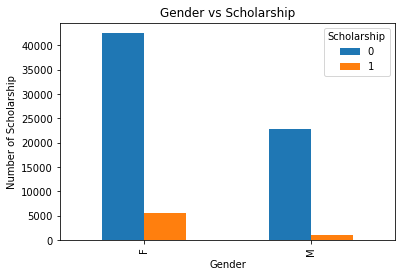

In [25]:
CrosstabResult=pd.crosstab(index=data['Gender'],columns=data['Scholarship'])
print(CrosstabResult)

CrosstabResult.plot.bar();
plt.ylabel('Number of Scholarship')
plt.title('Gender vs Scholarship')


The percentage of female patients who got `Scholarship` approval is 12% compared to 5% for male patients. However, out of 10,861 patients who got a scholarship, about 83% were females. This means that a female is more probable to received a medical scholarship than a male.

### Research Question 2  (What percentage of patients who got a scholarship eventually showed up for their appointment?)

No-show         No    Yes
Scholarship              
0            47099  18189
1             4338   2333


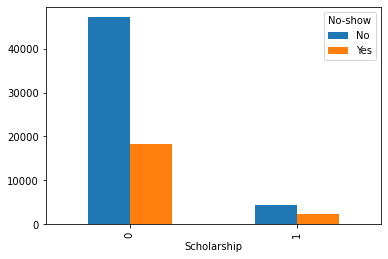

In [26]:
# Scholarship vs Appointment plot

SchvsApp=pd.crosstab(index=data['Scholarship'],columns=data['No-show'])
print(SchvsApp)

SchvsApp.plot.bar(); 



In [27]:
print(f"Patients who get a Scholarship are {100 * SchvsApp['No'][1]/SchvsApp.iloc[1].sum():.0f}% likely to show up for their appointments")

Patients who get a Scholarship are 65% likely to show up for their appointments


This value above may seem to imply that patients with scholarship show up more but 80% of those with no scholarships also turn up for their appointments.

### Research Question 3 (What is the `Age` distribution of patients who didn't show up for their appointment? )

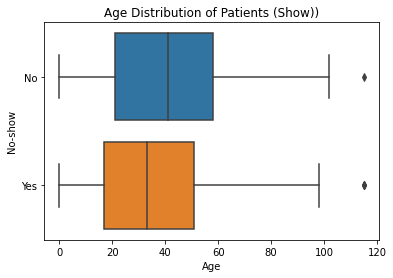

In [28]:
sns.boxplot( x='Age', y='No-show', data = data, orient='h')

plt.title('Age Distribution of Patients (Show))');

In [29]:
data.groupby('No-show')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
No-show,,,,,,,,
No,51437.0,39.965706,23.140047,0.0,21.0,41.0,58.0,115.0
Yes,20522.0,34.835299,21.954582,0.0,17.0,33.0,51.0,115.0


The `Age` distribution for the two classes are positively skewed. 50% of patients who failed appointments fall in the age bracket between 21 and 58.

### Research Question 4 (What are the top 4 neighbourhoods that did not host patients?)

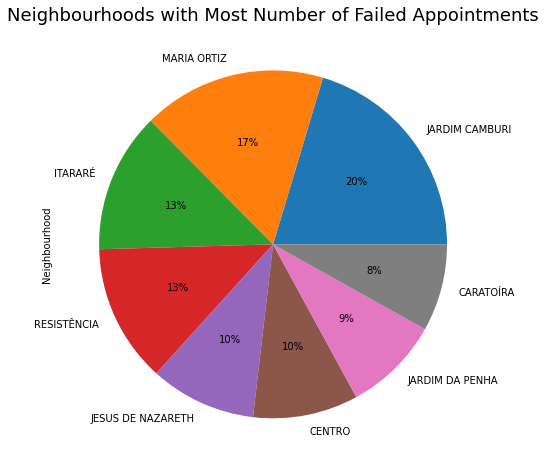

In [30]:
data[data['No-show']=='Yes']['Neighbourhood'].value_counts()[:8].plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%')
plt.title("Neighbourhoods with Most Number of Failed Appointments", fontsize=18);

In [31]:
data[data['No-show']=='Yes']['Neighbourhood'].value_counts()[:8]

JARDIM CAMBURI       1359
MARIA ORTIZ          1138
ITARARÉ               869
RESISTÊNCIA           857
JESUS DE NAZARETH     658
CENTRO                653
JARDIM DA PENHA       597
CARATOÍRA             541
Name: Neighbourhood, dtype: int64

The pie chart above depicts the top 8 `Neighbourhood` with the highest level of failed appointments. Of these, the top 2 are: `JARDIM CAMBURI` and `MARIA ORTIZ`.


### <a id='conclusions'></a>
## Conclusions
The results of this analysis is only tentative, as a further study could have uncovered more insights. The analysis does not imply in anyway that changes in one feature causes another, based on a correlation. However, these are the conclusions drawn from the analysis above:
> 1. Females are 7% more likely to get scholarship approval.
> 2. The number of patients who show up for medical appointments is independent of whether or not the patient was sponsored.
> 3. Female patients are more likely to be sponsored.
> 4. Age distribution of patients who fulfilled or failed an appointment are similar. Age has little effect on whether a patient will or will not go for a medical appointment.
> 5. Patients who schedule a medical session in `Jardim Camburi` and `Maria Ortiz` have a high chance of being absent on appointment day.


### Limitations 

> 1. This analysis does not take into account the duration between `ScheduledDay` and `AppointmentDay`, and whether or not SMS reminder was sent. 
> 2. `Neighbourhood` column could have been geocoded using a map API to give the lat and lon of each location. Such data can be used for plotting each location on map.
> 3. 35% of 110567 observations in the dataset was dropped as a result of invalid wait period. This could significantly influence the insights from analysis.

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1